IMPORTING PACKAGES

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import scipy.stats as stats




LOADING DATA

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
submission = pd.read_csv("SampleSubmission.csv")



In [3]:
train.shape ,test.shape,submission.shape 


((21454, 19), (7194, 18), (7194, 2))

In [4]:
train.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


COMBINING THE DATASETS

In [5]:
target=train["Target"]


In [6]:
train['spliter'] ='train'
test['spliter'] ='test' # creating a new column  called spliter to distinguish between train and test that later will be used to split again the totaldata into respectively original train and test data .
data =pd.concat([train,test],ignore_index=True,sort=False)#Concatenate the train and test data to form the totaldata for easily performing data cleaning up,transformation and imputing. 


In [7]:
train.shape ,submission.shape ,test.shape 



((21454, 20), (7194, 2), (7194, 19))

EXPLORING THE DATA

In [8]:
data.shape



(28648, 20)

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28648 entries, 0 to 28647
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       28648 non-null  object 
 1   country                                  28648 non-null  object 
 2   year                                     28648 non-null  int64  
 3   urban_or_rural                           28648 non-null  object 
 4   ghsl_water_surface                       28648 non-null  float64
 5   ghsl_built_pre_1975                      28648 non-null  float64
 6   ghsl_built_1975_to_1990                  28648 non-null  float64
 7   ghsl_built_1990_to_2000                  28648 non-null  float64
 8   ghsl_built_2000_to_2014                  28648 non-null  float64
 9   ghsl_not_built_up                        28648 non-null  float64
 10  ghsl_pop_density                         28648

In [10]:
data.describe().T



,count,mean,std,min,25%,50%,75%,max
year,28648.0,2010.271537,4.553145,1994.000000,2008.000000,2011.000000,2014.000000,2016.000000
ghsl_water_surface,28648.0,0.027018,0.095199,0.000000,0.000000,0.000000,0.000000,0.991100
ghsl_built_pre_1975,28648.0,0.041010,0.118721,0.000000,0.000000,0.000160,0.008011,0.894608
ghsl_built_1975_to_1990,28648.0,0.027820,0.072850,0.000000,0.000000,0.000602,0.010037,0.685010
ghsl_built_1990_to_2000,28648.0,0.013713,0.034208,0.000000,0.000037,0.000936,0.008823,0.515534
ghsl_built_2000_to_2014,28648.0,0.018369,0.040241,0.000000,0.000109,0.001727,0.015209,0.649159
ghsl_not_built_up,28648.0,0.872069,0.242707,0.000859,0.895615,0.992725,0.999592,1.000000
ghsl_pop_density,28648.0,95.101508,210.079701,0.000000,2.943082,16.424158,64.364772,1902.876955
landcover_crops_fraction,28648.0,21.097237,16.309999,0.000000,6.105505,19.297194,33.199903,80.064918
landcover_urban_fraction,28648.0,14.079153,23.917510,0.000000,0.705307,2.599028,13.063126,98.784092


In [11]:
data.isnull().sum()


ID                                            0
country                                       0
year                                          0
urban_or_rural                                0
ghsl_water_surface                            0
ghsl_built_pre_1975                           0
ghsl_built_1975_to_1990                       0
ghsl_built_1990_to_2000                       0
ghsl_built_2000_to_2014                       0
ghsl_not_built_up                             0
ghsl_pop_density                              0
landcover_crops_fraction                      0
landcover_urban_fraction                      0
landcover_water_permanent_10km_fraction       0
landcover_water_seasonal_10km_fraction        0
nighttime_lights                              0
dist_to_capital                               0
dist_to_shoreline                             0
Target                                     7194
spliter                                       0
dtype: int64

In [12]:
data.duplicated().any()



False

EDA & VISUALIZATION

In [13]:
# function to create histogram, Q-Q plot and
# boxplot. For visualizing the features


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()
    

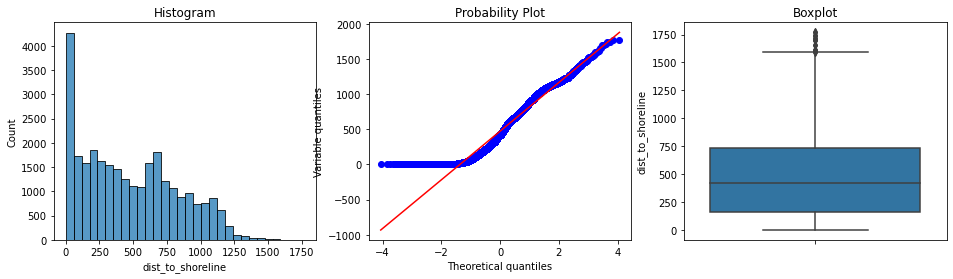

In [14]:
# let's find outliers in DS

diagnostic_plots(data, 'dist_to_shoreline')


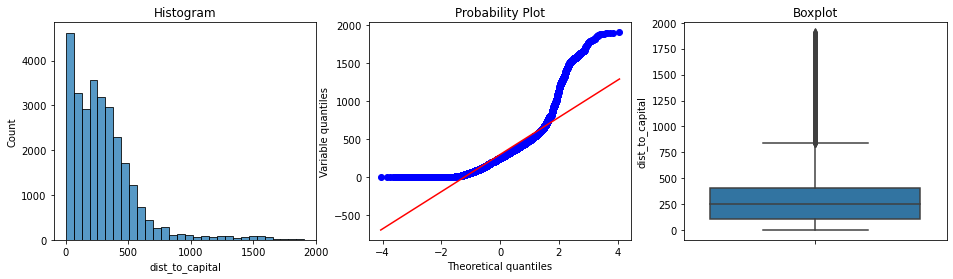

In [15]:
diagnostic_plots(data, 'dist_to_capital')



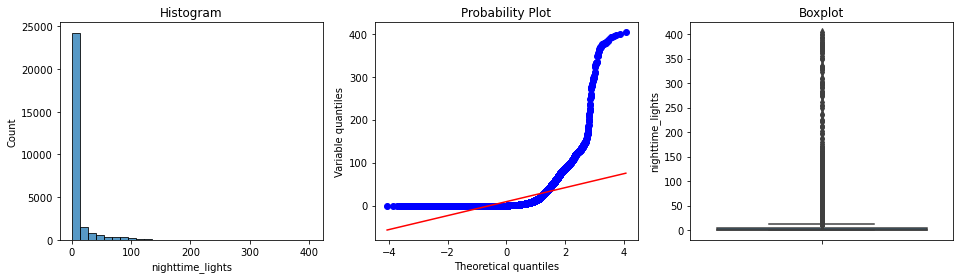

In [16]:
diagnostic_plots(data, 'nighttime_lights')



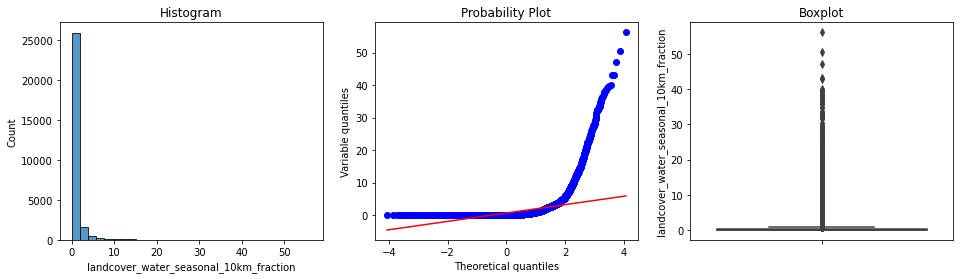

In [17]:
diagnostic_plots(data, 'landcover_water_seasonal_10km_fraction')



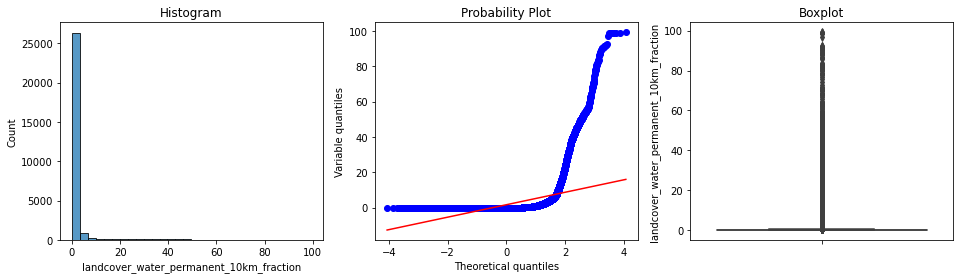

In [18]:
diagnostic_plots(data, 'landcover_water_permanent_10km_fraction')



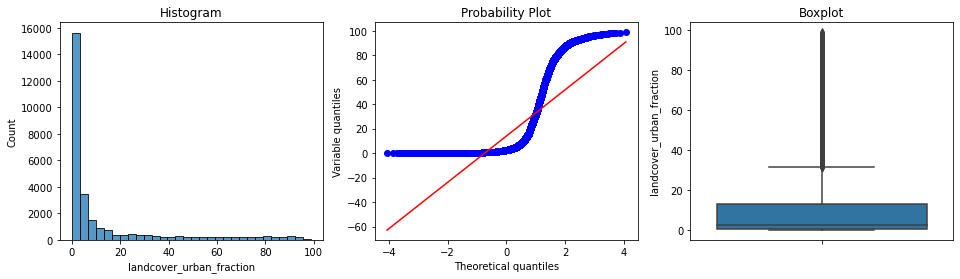

In [19]:
diagnostic_plots(data, 'landcover_urban_fraction')


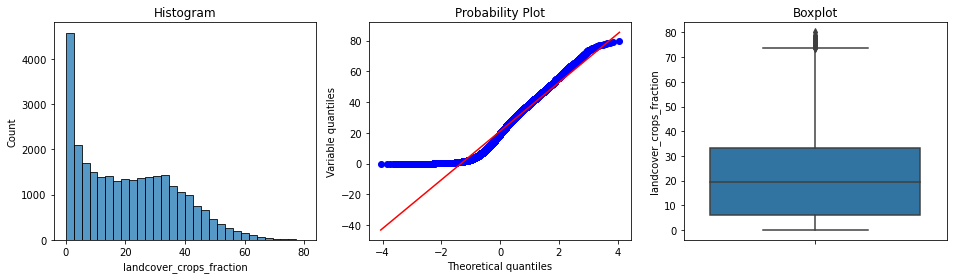

In [20]:
diagnostic_plots(data, 'landcover_crops_fraction')


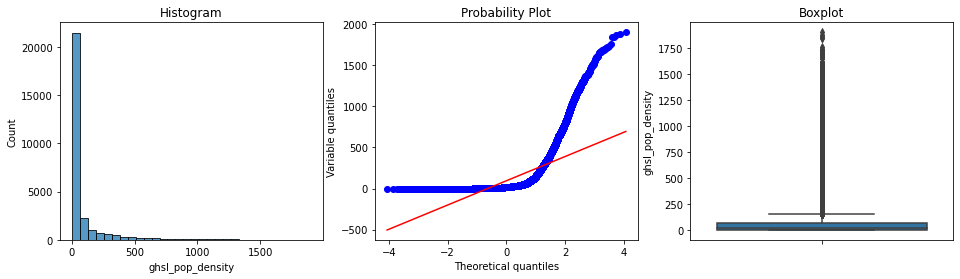

In [21]:
diagnostic_plots(data, 'ghsl_pop_density')



PRE-PROCESSING

In [22]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary



In [23]:
# find limits for dist_to_shoreline

DS_upper_limit, DS_lower_limit = find_skewed_boundaries(data, 'dist_to_shoreline', 1.5)
DS_upper_limit, DS_lower_limit


(1593.136691451072, -701.7553235674866)

In [24]:
# find limits for dist_to_capital 

DC_upper_limit, DC_lower_limit = find_skewed_boundaries(data, 'dist_to_capital', 1.5)
DC_upper_limit, DC_lower_limit


(843.2659691192258, -328.6964087714379)

In [25]:
# find limits for nighttime_lights

NL_upper_limit, NL_lower_limit = find_skewed_boundaries(data, 'nighttime_lights', 1.5)
NL_upper_limit, NL_lower_limit


(12.408680535462606, -7.445208321277564)

In [26]:
# find limits for landcover_water_seasonal_10km_fraction

LWS_upper_limit, LWS_lower_limit = find_skewed_boundaries(data, 'landcover_water_seasonal_10km_fraction', 1.5)
LWS_upper_limit, LWS_lower_limit


(0.9364584023085594, -0.559645174067085)

In [27]:
# find limits for landcover_water_permanent_10km_fraction

LWP_upper_limit, LWP_lower_limit = find_skewed_boundaries(data, 'landcover_water_permanent_10km_fraction', 1.5)
LWP_upper_limit, LWP_lower_limit


(0.4306065466242574, -0.25836392797455443)

In [28]:
 #find limits for landcover_urban_fraction

LU_upper_limit, LU_lower_limit = find_skewed_boundaries(data, 'landcover_urban_fraction', 1.5)
LU_upper_limit, LU_lower_limit


(31.59985501920121, -17.831422064200023)

In [29]:
# find limits for landcover_crops_fraction

LC_upper_limit, LC_lower_limit = find_skewed_boundaries(data, 'landcover_crops_fraction', 1.5)
LC_upper_limit, LC_lower_limit


(73.8414991916625, -34.53609145210317)

In [30]:
# find limits for lghsl_pop_density

PD_upper_limit, PD_lower_limit = find_skewed_boundaries(data, 'ghsl_pop_density', 1.5)
PD_upper_limit, PD_lower_limit


(156.49730714152233, -89.18945270637103)

In [31]:
#Now let's replace the outliers by the maximum and minimum limit

data['dist_to_shoreline']= np.where(data['dist_to_shoreline'] > DS_upper_limit, DS_upper_limit,
                       np.where(data['dist_to_shoreline'] < DS_lower_limit, DS_lower_limit, data['dist_to_shoreline']))


In [32]:
data['dist_to_capital']= np.where(data['dist_to_capital'] > DC_upper_limit, DC_upper_limit,
                       np.where(data['dist_to_capital'] < DC_lower_limit, DC_lower_limit, data['dist_to_capital']))

In [33]:
data[' nighttime_lights']= np.where(data['nighttime_lights'] > NL_upper_limit, NL_upper_limit,
                       np.where(data['nighttime_lights'] < NL_lower_limit, NL_lower_limit, data['nighttime_lights']))

In [34]:
data['landcover_water_seasonal_10km_fraction']= np.where(data['landcover_water_seasonal_10km_fraction'] > LWS_upper_limit, LWS_upper_limit,
                       np.where(data['landcover_water_seasonal_10km_fraction'] < LWS_lower_limit, LWS_lower_limit, data['landcover_water_seasonal_10km_fraction']))

In [35]:
data['landcover_water_permanent_10km_fraction']= np.where(data['landcover_water_permanent_10km_fraction'] > LWP_upper_limit, LWP_upper_limit,
                       np.where(data['landcover_water_permanent_10km_fraction'] < LWP_lower_limit, LWP_lower_limit, data['landcover_water_permanent_10km_fraction']))

In [36]:
data['landcover_urban_fraction']= np.where(data['landcover_urban_fraction'] > LU_upper_limit, LU_upper_limit,
                       np.where(data['landcover_urban_fraction'] < LU_lower_limit, LU_lower_limit, data['landcover_urban_fraction']))

In [37]:
data['landcover_crops_fraction']= np.where(data['landcover_crops_fraction'] > LC_upper_limit, LC_upper_limit,
                       np.where(data['landcover_crops_fraction'] < LC_lower_limit, LC_lower_limit, data['landcover_crops_fraction']))

In [38]:
data['ghsl_pop_density']= np.where(data['ghsl_pop_density'] > PD_upper_limit, PD_upper_limit,
                       np.where(data['ghsl_pop_density'] < PD_lower_limit, PD_lower_limit, data['ghsl_pop_density']))

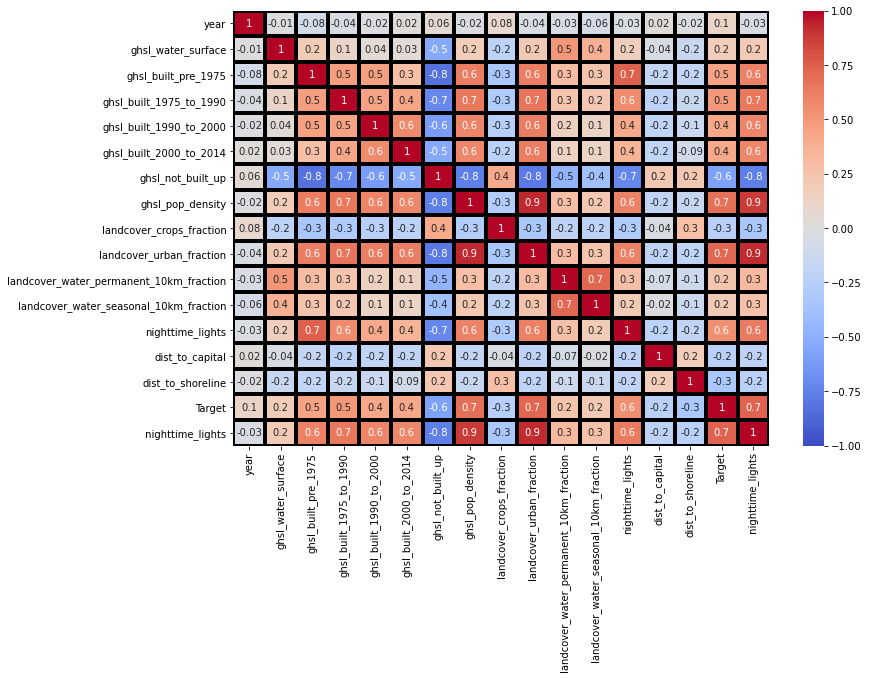

In [39]:
## using pearson correlation
plt.figure(figsize = (12,8))
ax=sns.heatmap(data.corr(),annot=True,fmt='.1g',vmin=-1, vmax=1, center= 0,cmap= 'coolwarm', linewidths=3, linecolor='black')


In [40]:
## Selecting the high correlated feature using a function below
def correlation(dataset,threshold):
    col_corr = set() ## set of all correlated columns
    corr_matrix =dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])> threshold:
                colname= corr_matrix.columns[i] ##get name of correlated columns
                col_corr.add(colname)
                return col_corr
            

In [41]:
corr_features = correlation(data,0.8)
len(set(corr_features))


1

In [42]:
corr_features


{'landcover_urban_fraction'}

In [43]:
data.drop(corr_features,axis=1,inplace=True)



In [44]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28648 entries, 0 to 28647
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       28648 non-null  object 
 1   country                                  28648 non-null  object 
 2   year                                     28648 non-null  int64  
 3   urban_or_rural                           28648 non-null  object 
 4   ghsl_water_surface                       28648 non-null  float64
 5   ghsl_built_pre_1975                      28648 non-null  float64
 6   ghsl_built_1975_to_1990                  28648 non-null  float64
 7   ghsl_built_1990_to_2000                  28648 non-null  float64
 8   ghsl_built_2000_to_2014                  28648 non-null  float64
 9   ghsl_not_built_up                        28648 non-null  float64
 10  ghsl_pop_density                         28648

Encoding the categorical features

In [45]:
del data['nighttime_lights']


In [46]:
data.shape 


(28648, 19)

In [47]:
#import preprocessing module 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['urban_or_rural'] = le.fit_transform(data['urban_or_rural'])
data['country'] = le.fit_transform(data['country'])


In [48]:
data.shape 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28648 entries, 0 to 28647
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       28648 non-null  object 
 1   country                                  28648 non-null  int64  
 2   year                                     28648 non-null  int64  
 3   urban_or_rural                           28648 non-null  int64  
 4   ghsl_water_surface                       28648 non-null  float64
 5   ghsl_built_pre_1975                      28648 non-null  float64
 6   ghsl_built_1975_to_1990                  28648 non-null  float64
 7   ghsl_built_1990_to_2000                  28648 non-null  float64
 8   ghsl_built_2000_to_2014                  28648 non-null  float64
 9   ghsl_not_built_up                        28648 non-null  float64
 10  ghsl_pop_density                         28648

In [49]:
data.shape 


(28648, 19)

SPLITTING DATA

In [50]:
#Splitting of the columns back to  the original test and train by using the spliter column.
train =data.loc[data['spliter']=='train']
test = data.loc[data['spliter']=='test']


In [51]:
train.shape,test.shape 


((21454, 19), (7194, 19))

In [52]:
test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7194 entries, 21454 to 28647
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       7194 non-null   object 
 1   country                                  7194 non-null   int64  
 2   year                                     7194 non-null   int64  
 3   urban_or_rural                           7194 non-null   int64  
 4   ghsl_water_surface                       7194 non-null   float64
 5   ghsl_built_pre_1975                      7194 non-null   float64
 6   ghsl_built_1975_to_1990                  7194 non-null   float64
 7   ghsl_built_1990_to_2000                  7194 non-null   float64
 8   ghsl_built_2000_to_2014                  7194 non-null   float64
 9   ghsl_not_built_up                        7194 non-null   float64
 10  ghsl_pop_density                         71

In [53]:
train.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 21454 entries, 0 to 21453
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       21454 non-null  object 
 1   country                                  21454 non-null  int64  
 2   year                                     21454 non-null  int64  
 3   urban_or_rural                           21454 non-null  int64  
 4   ghsl_water_surface                       21454 non-null  float64
 5   ghsl_built_pre_1975                      21454 non-null  float64
 6   ghsl_built_1975_to_1990                  21454 non-null  float64
 7   ghsl_built_1990_to_2000                  21454 non-null  float64
 8   ghsl_built_2000_to_2014                  21454 non-null  float64
 9   ghsl_not_built_up                        21454 non-null  float64
 10  ghsl_pop_density                         21454

In [54]:
train.shape,test.shape 


((21454, 19), (7194, 19))

In [55]:
#Droping the Spliter columns,since it is not needed anymore !
train.drop('spliter',axis=1,inplace=True)
test.drop('spliter',axis =1,inplace =True)


In [56]:
train.shape,test.shape 



((21454, 18), (7194, 18))

In [57]:
feat_cols = train.drop(["ID","Target"],1)
cols = feat_cols.columns
y=train['Target']

In [58]:
Train=train[cols]
Test=test[cols]


In [59]:
Train.head()


,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,dist_to_capital,dist_to_shoreline,nighttime_lights
0,7,2016,0,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.000000,0.000000,278.788451,769.338378,0.000000
1,7,2005,0,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.000000,0.005427,200.986978,337.135243,0.000000
2,14,2009,0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.000000,0.003078,642.594208,169.913773,0.000000
3,12,2015,0,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,0.430607,0.131035,365.349451,613.591610,0.000000
4,9,2012,1,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,0.005047,0.130475,222.867189,192.926363,1.461894


In [60]:
Train.shape,Test.shape


((21454, 16), (7194, 16))

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Train,target, test_size=0.20, random_state = 2021)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)



(17163, 16) (17163,)
(4291, 16) (4291,)


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error


In [63]:
model =LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

##evaluation
rmse = mean_squared_error(y_test, y_pred)
print('Using scikit-lean, the error is {}'.format(rmse))


Using scikit-lean, the error is 0.013390452659982099


In [64]:
model2 =KNeighborsRegressor(n_neighbors=50)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)

##evaluation
rmse = mean_squared_error(y_test, y_pred)
print('Using scikit-lean, the error is {}'.format(rmse))





Using scikit-lean, the error is 0.015737275736572853


In [65]:
model3 =DecisionTreeRegressor()
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)

##evaluation
rmse = mean_squared_error(y_test, y_pred)
print('Using scikit-lean, the error is {}'.format(rmse))


Using scikit-lean, the error is 0.015711043972788566


In [66]:
model4 =RandomForestRegressor()
model4.fit(X_train,y_train)
y_pred = model4.predict(X_test)

##evaluation
rmse = mean_squared_error(y_test, y_pred)
print('Using scikit-lean, the error is {}'.format(rmse))



Using scikit-lean, the error is 0.008343992555640617


In [67]:
model5 =GradientBoostingRegressor()
model5.fit(X_train,y_train)
y_pred = model4.predict(X_test)

##evaluation
rmse = mean_squared_error(y_test, y_pred)
print('Using scikit-lean, the error is {}'.format(rmse))


Using scikit-lean, the error is 0.008343992555640617


In [68]:
model5 =LGBMRegressor()
model5.fit(X_train,y_train)
y_pred = model4.predict(X_test)

##evaluation
rmse = mean_squared_error(y_test, y_pred)
print('Using scikit-lean, the error is {}'.format(rmse))


Using scikit-lean, the error is 0.008343992555640617


In [69]:
#Prediction
pred = Test
predictions= model4.predict(pred)


In [70]:
submit = submission.copy() #Copy the submission file to the variable submit 
submit.Target = predictions
submit.to_csv('zero3.csv',index=False)

In [71]:
submit.shape

(7194, 2)

In [72]:
submit.head()

,ID,Target
0,ID_AAcismbB,0.187340
1,ID_AAeBMsji,0.259985
2,ID_AAjFMjzy,0.672035
3,ID_AAmMOEEC,0.371950
4,ID_ABguzDxp,0.238249
